### Objectives of this notebook:
- display output from ABRM
- perform analysis on output. eg. feature importance and model selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import ABRM_functions

# pio.renderers.default = "notebook"
pio.renderers.default = "browser"


### Import data
- one df with FD performance of each particle  
- one df with associated particle position  
- one dicct with initial setup that would allow reproduction of results

In [2]:
dataset = ["2020_06_18_17_31"]
misfit_tolerance = 0.1

df_performance,df_position,df_tof,setup_all, FD_targets = ABRM_functions.read_data(dataset)

print("Number of models and parameters:")
display(df_position.shape)
print("Number of particles:")
display(df_position.particle_no.max()+1)
print("Number of Iterations:")
display(df_position.iteration.max()+1)
display(df_performance.head())
display(df_position.head())
display(df_tof.head())

Number of models and parameters:


(750, 38)

Number of particles:


30

Number of Iterations:


25

EV        tD         F       Phi        LC           tof  \
0  0.000000  0.000000  0.000000  0.000000  0.153355  2.120623e+04   
1  0.648339  0.648340  0.000180  0.000115  0.153355  1.170811e+08   
2  0.653424  0.653427  0.000357  0.000230  0.153355  6.827937e+04   
3  0.656284  0.656288  0.000510  0.000330  0.153355  1.303424e+08   
4  0.658780  0.658786  0.000696  0.000453  0.153355  1.495443e+05   

   particle_no    misfit  iteration           dataset  
0            0  0.256036          0  2020_06_18_17_31  
1            0  0.256036          0  2020_06_18_17_31  
2            0  0.256036          0  2020_06_18_17_31  
3            0  0.256036          0  2020_06_18_17_31  
4            0  0.256036          0  2020_06_18_17_31

TI1  F1_I_MIN  F1_I_MAX  F1_J_MIN  F1_J_MAX  F1_K_MIN  F1_K_MAX  TI2  \
0  3.0      54.0     142.0      17.0      27.0       6.0       7.0  1.0   
1  3.0      76.0     170.0      79.0      87.0       2.0       7.0  1.0   
2  2.0     134.0     180.0      16.0      36.0       2.0       3.0  4.0   
3  2.0      56.0     124.0      41.0      47.0       6.0       6.0  1.0   
4  3.0      30.0     178.0      33.0      41.0       4.0       7.0  3.0   

   F2_I_MIN  F2_I_MAX  ...    FracpermZ  MatrixpermZ    misfit  particle_no  \
0      65.0      87.0  ...  2620.928867    37.171488  0.256036            0   
1      84.0     124.0  ...  2351.530870    37.081412  0.117387            1   
2      26.0     174.0  ...  4237.799246    59.328655  0.264898            2   
3     167.0     188.0  ...   543.371362    21.065676  0.356613            3   
4      42.0     110.0  ...  3170.805981     7.754582  0.135109            4   

         LC  entropy_swarm  diversity_swarm  diversity_best  iteration  \
0  0.153355          147.3         0.154239         0.51721          0   
1  0.246618          147.3         0.154239         0.51721          0   
2  0.151511          147.3         0.154239         0.51721          0   
3  0.099476          147.3         0.154239         0.51721          0   
4  0.234735          147.3         0.154239         0.51721          0   

            dataset  
0  2020_06_18_17_31  
1  2020_06_18_17_31  
2  2020_06_18_17_31  
3  2020_06_18_17_31  
4  2020_06_18_17_31  

[5 rows x 38 columns]

tof    misfit  particle_no  iteration           dataset
0   21206.234826  0.256036            0          0  2020_06_18_17_31
1   59797.582915  0.256036            0          0  2020_06_18_17_31
2  120269.666395  0.256036            0          0  2020_06_18_17_31
3  205199.747779  0.256036            0          0  2020_06_18_17_31
4  316065.045901  0.256036            0          0  2020_06_18_17_31

### Plot performance

In [49]:
# pio.renderers.default = "notebook"
pio.renderers.default = "browser"
ABRM_functions.plot_performance(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance)

### Boxplots parameters
explore if ranges of parameters need potential modifications

In [50]:
pio.renderers.default = "notebook"
# pio.renderers.default = "browser"
ABRM_functions.plot_box(df = df_position,setup_all = setup_all, dataset = dataset)

### Histogram Paramters

In [51]:
ABRM_functions.plot_hist(df = df_position,setup_all = setup_all, dataset = dataset,misfit_tolerance = None)

### Histograms for best models parameters

In [52]:
ABRM_functions.plot_hist(df = df_position,setup_all = setup_all, dataset = dataset,misfit_tolerance = misfit_tolerance)

In [44]:
# def plot_tof_hist(df, misfit_tolerance = None):
   
window_shape = (10,10,7)
step_size = 10
iterations = df_tof_short["iteration"].unique().tolist()
particle_no = df_tof_short["particle_no"].unique().tolist()
df_best_for_clustering = pd.DataFrame(columns = np.arange(20*10*1))
for i in range(0,len(iterations)):
    iteration = iterations[i]
    for j in range(0,len(particle_no)):
        particle = particle_no[j]
        tof_single_particle = np.array(df_tof_short[(df_tof_short.iteration == iteration) & (df_tof_short.particle_no == particle)].tof)
        tof_single_particle_3d = tof_single_particle.reshape((200,100,7))
        tof_single_particle_moving_window = view_as_windows(tof_single_particle_3d, window_shape, step= step_size)
        tof_single_particle_upscaled = []
        for k in range(0,20):
            for l in range(0,10):
                for m in range(0,1):
                    single_cell_temp = np.round(np.mean(tof_single_particle_moving_window[k,l,m]),2)
                    tof_single_particle_upscaled.append(single_cell_temp)

        df_tof_single_particle_upscaled = pd.DataFrame(np.log10(np.array(tof_single_particle_upscaled)))
        df_tof_single_particle_upscaled_transposed = df_tof_single_particle_upscaled.T
        df_tof_single_particle_upscaled_transposed["particle_no"] = particle
        df_tof_single_particle_upscaled_transposed["iteration"] = iteration
        df_best_for_clustering = df_best_for_clustering.append(df_tof_single_particle_upscaled_transposed)

# columns = list(np.arange(0,df_best_for_clustering.shape[1]))

# cols_range = [1,2,3]

# n_cols = int(len(cols_range))
# n_rows = int(np.ceil(len(columns)/n_cols))

# cols = cols_range* n_rows 
# len_row  = list(np.arange(1,n_rows+1,1))
# rows = sorted(n_cols*len_row)

# for i in range(0,len(rows)):
#     rows[i]=rows[i].item()

# n_subplots = len(columns)/n_rows/n_cols

# fig = make_subplots(rows=n_rows, cols=n_cols)#, subplot_titles=(columns))

# if misfit_tolerance is not None:

#     df_best =df[(df.misfit <= misfit_tolerance)]
#     df_best = df_best[columns]

#     for i in range(0,len(columns)):
#         # fig.append_trace(go.Histogram(x=df[columns[i]]),row = rows[i],col = cols[i])

#         fig.append_trace(go.Histogram(x=df_best[columns[i]]),row = rows[i],col = cols[i])

#         fig.update_layout(
#                 showlegend=False,
#                 barmode='overlay'        # Overlay both histograms
#                 )
#         fig.update_traces(opacity = 0.75) # Reduce opacity to see both histograms


#     fig.update_layout(autosize=False,
#         title= "Histogram Parameters",
#         width=1000,
#         height=750*(n_subplots)
#     )
#     fig.show()

# else:

#     for i in range(0,len(columns)):

#         fig.append_trace(go.Histogram(x=df[columns[i]]),row = rows[i],col = cols[i])
#         fig.update_layout(
#                 showlegend=False
#                 )
#     fig.update_layout(autosize=False,
#         title= "Histogram Parameters",
#         width=1000,
#         height=750*(n_subplots)
#     )
#     fig.show()

In [45]:
plot_tof_hist(df_tof)

KeyboardInterrupt: 

In [8]:
iterations = 2
particles = 30
cells = 140000
shorten = cells* iterations * particles -1
df_tof.shape
df_tof_short = df_tof.truncate(after = shorten)
df_tof_short.shape

(8400000, 5)

### Cluster best models with UMAP and HDBSCAN

In [ ]:
df_best = ABRM_functions.best_model_selection_UMAP_HDBSCAN(df_position = df_position,df_tof = df_tof,cluster_parameter = "tof",dataset =dataset,setup_all = setup_all,
                                                           n_neighbors= 5, min_cluster_size=5, misfit_tolerance = misfit_tolerance,
                                                           use_UMAP = True)


In [4]:
# def save_best_clustered_models(df_best,datasets):
pio.renderers.default = "notebook"

import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_clusters = df_best.cluster.max()

best_models_to_save = pd.DataFrame()

#     base_path = Path(__file__).parent

# randomly sample 1 model from each lcusters that has a perfect match to the cluster (prob =1)
for i in range(0,n_clusters+1):
    best_per_cluster = df_best[(df_best.cluster == i) & (df_best.cluster_prob ==1)].sample()
    best_models_to_save = best_models_to_save.append(best_per_cluster)

# get models that arent clustered and append them
if -1 is not df_best.cluster:
    best_models_to_save = best_models_to_save.append(df_best[df_best.cluster == -1])

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_best.cluster_x,
                        y = df_best.cluster_y,

                        mode='markers',
                        text = df_best.index,
                        marker=dict(
                            size=16,
                            color=df_best.particle_no, #set color equal to a variable
                            colorscale= "deep",#'Viridis', # one of plotly colorscales
#                             showscale=True,
#                             colorbar=dict(title="Clusters")
                            )
                        ))
fig.add_trace(go.Scatter(x = best_models_to_save.cluster_x,
                        y = best_models_to_save.cluster_y,

                        mode='markers',
                        text = best_models_to_save.index,
                        marker=dict(
                            size=10,
                            color="red", #set color equal to a variable
                            colorscale= "deep",#'Viridis', # one of plotly colorscales
                            )
                        ))
# fig.update_layout(title='Clustering of {} best models - Number of clusters found: {} - Unclustered models: {}'.format(df_best.shape[0],df_best.cluster.max()+1,abs(df_best.cluster[df_best.cluster == -1].sum())))
fig.show()

In [26]:
best_models_to_save


TI1  F1_I_MIN  F1_I_MAX  F1_J_MIN  F1_J_MAX  F1_K_MIN  F1_K_MAX  TI2  \
420  4.0       1.0     200.0       8.0      98.0       7.0       7.0  4.0   
699  3.0      26.0      78.0      17.0      68.0       5.0       6.0  2.0   
745  3.0     106.0     200.0       1.0       1.0       1.0       3.0  3.0   
114  2.0     141.0     188.0       1.0      55.0       1.0       7.0  3.0   
406  2.0      44.0     200.0       1.0      96.0       5.0       7.0  4.0   
391  4.0      81.0     124.0      10.0     100.0       3.0       7.0  3.0   
736  2.0      61.0     184.0      40.0      54.0       2.0       4.0  2.0   
678  4.0      17.0      68.0      40.0      70.0       3.0       4.0  3.0   
620  4.0      58.0      65.0      57.0      74.0       3.0       3.0  3.0   
743  4.0      83.0     103.0      92.0      92.0       1.0       2.0  3.0   
439  2.0     122.0     200.0      33.0      48.0       4.0       6.0  2.0   
486  3.0      76.0     122.0       1.0       1.0       2.0       4.0  3.0   
502  1.0     109.0     196.0      31.0      58.0       3.0       7.0  2.0   
566  4.0      36.0      91.0      69.0      91.0       2.0       4.0  3.0   
630  2.0      51.0     200.0      34.0      72.0       3.0       6.0  2.0   

     F2_I_MIN  F2_I_MAX  ...        LC  entropy_swarm  \
420       1.0       1.0  ...  0.469937     158.164873   
699     131.0     140.0  ...  0.446668     154.071962   
745      38.0      85.0  ...  0.463587     151.989947   
114      35.0     200.0  ...  0.467464     168.982571   
406       1.0       1.0  ...  0.446937     158.497920   
391     125.0     159.0  ...  0.457405     158.505232   
736       1.0      86.0  ...  0.407778     152.378601   
678      47.0     165.0  ...  0.494615     153.962056   
620      50.0     163.0  ...  0.430929     154.233911   
743      49.0     157.0  ...  0.471821     152.435155   
439       1.0      22.0  ...  0.491751     159.245552   
486      75.0     138.0  ...  0.447640     157.109954   
502       1.0      61.0  ...  0.507518     157.386084   
566      57.0     168.0  ...  0.463868     154.930594   
630       1.0      19.0  ...  0.517994     154.318142   

     tof_upscaled_entropy_swarm  combined_misfit_entropy_swarm  iteration  \
420                 1390.437484                       0.337071          7   
699                 1452.265916                       0.323990         12   
745                 1457.802093                       0.314655         13   
114                 1201.695478                       0.460051          2   
406                 1389.851001                       0.365182          7   
391                 1390.262264                       0.371765          7   
736                 1458.200598                       0.365190         13   
678                 1452.005543                       0.326693         12   
620                 1444.724965                       0.350918         11   
743                 1457.879580                       0.315863         13   
439                 1406.792500                       0.365198          8   
486                 1423.281717                       0.335656          9   
502                 1423.368504                       0.376202          9   
566                 1435.554865                       0.324489         10   
630                 1445.044437                       0.355313         11   

              dataset  cluster_prob  cluster  cluster_x  cluster_y  
420  2020_05_31_11_37           1.0        0  -1.500021   0.936014  
699  2020_05_31_11_37           1.0        1   5.254183   5.741105  
745  2020_05_31_11_37           1.0        2  13.068232   1.247554  
114  2020_05_31_11_37           1.0        3   6.878535  11.609475  
406  2020_05_31_11_37           1.0        4   4.831527  14.346012  
391  2020_05_31_11_37           1.0        5  13.259784   3.131806  
736  2020_05_31_11_37           1.0        6  13.992915   5.188480  
678  2020_05_31_11_37           1.0        7   5.101576  17.312563  
620  

### Build best performing models for flow simulation

In [5]:
best_models = ABRM_functions.save_best_clustered_models(df_best = df_best, datasets = dataset)

In [13]:
best_index = best_models.index.tolist()

### Feature importance - model explainability

In [8]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [9]:
columns = setup_all[dataset[0]]["columns"]
X_train = df_position[columns]
Y_train = df_position.LC

In [10]:
# load JS visualization code to notebook
shap.initjs()

In [11]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


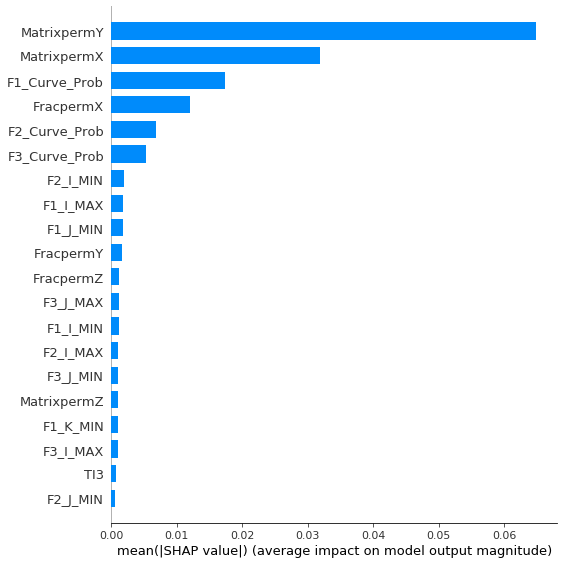

In [12]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [20]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [21]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

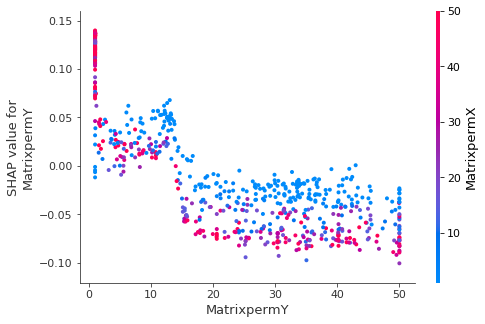

In [13]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("MatrixpermY", shap_values, X_train)

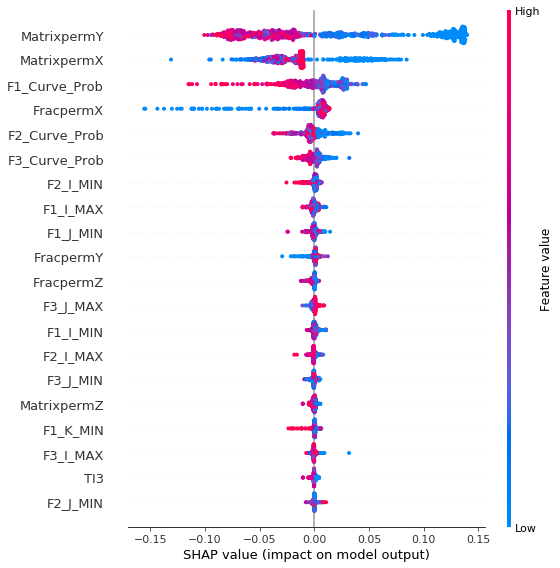

In [14]:
shap.summary_plot(shap_values, X_train)


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def plot_performance(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance):
    # Create traces

    fig = make_subplots(rows = 2, cols = 1,
                       subplot_titles = ("F - Phi Graph","Sweep Efficieny Graph"))

    ### Misfit ###
    
 

#     ### LC plot ###
    
#     fig.add_trace(go.Scatter(x = df_position.index, y=df_position.LC,
#                             mode='markers',
#                             line = dict(color = "lightgray"),
#                             name='Simulated'),row =1, col =2)
#     fig.add_trace(go.Scatter( x= df_position.index[(df_position.misfit <= misfit_tolerance)],y=df_position.loc[(df_position.misfit <= misfit_tolerance,"LC")],
#                                 mode = "markers",
#                             line = dict(color = "magenta")),row =1, col =2)
    
#     fig.add_shape(
#             # Line Horizontal
#                 type="line",
#                 x0=0,
#                 y0=FD_targets[dataset[0]]["LC_interpolated"], # make date a criterion taht can be changed
#                 x1=df_position.index.max(),
#                 y1=FD_targets[dataset[0]]["LC_interpolated"],
#                 line=dict(
#                     color="red",
#                     width=2),row =1, col = 2)

#     fig.update_xaxes(title_text = "particles",row = 1, col = 1)
#     fig.update_yaxes(title_text = "RMSE",row = 1, col = 1)
#     fig.update_xaxes(title_text = "particles",range = [0,df_position.index.max()],row =1, col = 2)
#     fig.update_yaxes(title_text = "LC",range = [0,1], row =1, col = 2)

    ### F - Phi plot ###
    colorscale = ['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']

#     fig.add_trace(go.Scatter(x=df_performance.Phi, y=df_performance.F,
#                             mode='lines',
#                             line = dict(color = "lightgray"),
#                             name='Simulated'),row =2, col =1)
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].F

            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].F
            cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())
            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = colorscale[cluster]),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)


    
    fig.add_trace(go.Scatter(x = FD_targets[dataset[0]]["Phi_interpolated"], y = FD_targets[dataset[0]]["F_interpolated"],
                            mode = "lines",
                            line = dict(color = "red", width = 3),
                            name = "target"),row =1, col =1)
    
    fig.add_trace(go.Scatter(x = [0,1], y = [0,1],
                            mode = "lines",
                            line = dict(color = "black", width = 3),
                            name = "homogeneous"),row =1, col =1)

    fig.update_xaxes(title_text = "Phi", range = [0,1],row =1, col =1)
    fig.update_yaxes(title_text = "F",range = [0,1], row =1, col = 1)

    ### Sweep efficiency plot ###
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].tD

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =2, col =1)

    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].tD
            cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = colorscale[cluster]),
                                text = "nothing yet",
                                name = "best simulations"),row =2, col =1)

    fig.update_xaxes(title_text = "tD", range = [0,1],row =2, col =1)
    fig.update_yaxes(title_text = "Ev",range = [0,1], row =2, col = 1)

    fig.update_layout(title='Performance Evaluation - Simulation run {}'.format(dataset),
                       autosize = False,
                     width = 1000,
                     height = 1000,
                     showlegend = False)

    fig.show()

In [16]:
# pio.renderers.default = "notebook"
pio.renderers.default = "browser"
plot_performance(df_performance_test,df_position,FD_targets,setup_all,dataset,misfit_tolerance)

In [4]:
df_performance_test = df_performance.copy()
df_performance_test["cluster"] = 8

In [5]:
df_performance_test.iteration

0          0
1          0
2          0
3          0
4          0
          ..
982795    12
982796    12
982797    12
982798    12
982799    12
Name: iteration, Length: 982800, dtype: int64

In [6]:
# EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].EV
# tof_single_particle = df_best_temp[(df_best_temp.iteration == iteration) & (df_best_temp.particle_no == particle)].tof

index = df_best.index
iteration = df_best.iteration.tolist()
particle_no = df_best.particle_no.tolist()
cluster = df_best.cluster.tolist()
for i in range(0,df_best.shape[0]):
    df_performance_test.cluster[(df_performance_test.iteration == iteration[i]) & (df_performance_test.particle_no == particle_no[i])] = cluster[i]
#     df_performance_test["cluster"] = df_best[(df_performance_test.iteration == df_best.iteration[i])].cluster


C:\Users\bs48\AppData\Local\Continuum\anaconda_3\envs\MRST\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



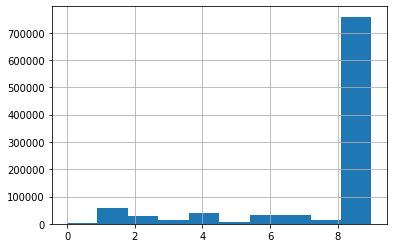

In [7]:
df_performance_test.cluster += 1

df_performance_test.cluster.hist()

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def plot_performance_selected(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance,best_index):
    # Create traces

    fig = make_subplots(rows = 2, cols = 1,
                       subplot_titles = ("F - Phi Graph","Sweep Efficieny Graph"))

    ### F - Phi plot ###
    colorscale = ['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']


    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].F

            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].F
#             cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())
            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = "gray"),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)
    
    for i in range (0,len(best_index)):
            iteration = int(df_position[(df_position.index == best_index[i])].iteration)
            particle_no = int(df_position[(df_position.index == best_index[i])].particle_no)
            Phi = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].Phi
            F = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].F
            fig.add_trace(go.Scatter(x=Phi, y=F,
                                mode='lines',
                                line = dict(color = colorscale[i] ),
                                text = "nothing yet",
                                name = "Simulated"),row =1, col =1)


    
    fig.add_trace(go.Scatter(x = FD_targets[dataset[0]]["Phi_interpolated"], y = FD_targets[dataset[0]]["F_interpolated"],
                            mode = "lines",
                            line = dict(color = "red", width = 3),
                            name = "target"),row =1, col =1)
    
    fig.add_trace(go.Scatter(x = [0,1], y = [0,1],
                            mode = "lines",
                            line = dict(color = "black", width = 3),
                            name = "homogeneous"),row =1, col =1)

    fig.update_xaxes(title_text = "Phi", range = [0,1],row =1, col =1)
    fig.update_yaxes(title_text = "F",range = [0,1], row =1, col = 1)

    ### Sweep efficiency plot ###
    
    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].tD

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = "lightgray"),
                                text = "nothing yet",
                                name = "Simulated"),row =2, col =1)

    for i in range (0,df_performance.iteration.max()):
        iteration = i 
        for j in range(0,df_performance.particle_no.max()):
            particle_no = j
            EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].EV
            tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no) & (df_performance.misfit <= misfit_tolerance)].tD

            fig.add_trace(go.Scatter(x=tD, y=EV,
                                mode='lines',
                                line = dict(color = "gray"),
                                text = "nothing yet",
                                name = "best simulations"),row =2, col =1)
    
    for i in range (0,len(best_index)):
        iteration = int(df_position[(df_position.index == best_index[i])].iteration)
        particle_no = int(df_position[(df_position.index == best_index[i])].particle_no)
        EV = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].EV
        tD = df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)& (df_performance.misfit <= misfit_tolerance)].tD
#             cluster = int(df_performance[(df_performance.iteration == iteration) & (df_performance.particle_no == particle_no)].cluster.unique())
        fig.add_trace(go.Scatter(x=tD, y=EV,
                            mode='lines',
                            line = dict(color = colorscale[i] ),
                            text = "nothing yet",
                            name = "Simulated"),row =2, col =1)
    

    fig.update_xaxes(title_text = "tD", range = [0,1],row =2, col =1)
    fig.update_yaxes(title_text = "Ev",range = [0,1], row =2, col = 1)

    fig.update_layout(title='Performance Evaluation - Simulation run {}'.format(dataset),
                       autosize = False,
                     width = 1000,
                     height = 1000,
                     showlegend = False)

    fig.show()

In [27]:
# pio.renderers.default = "notebook"
pio.renderers.default = "browser"
plot_performance_selected(df_performance,df_position,FD_targets,setup_all,dataset,misfit_tolerance,best_index)